# Implementing PCA with Scikit-Learn

https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Importing Dataset

In [11]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

In [12]:
dataset.head()
#print(dataset)

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing

In [13]:
X = dataset.drop('Class', 1)
#print(X)

y = dataset['Class']
#print(y)
target=y.unique()
print(target)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split # Depricated

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# PCA performs best with a normalized feature set

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training and Making Predictions with RandomForestClassifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

fit means to fit the model to the data being provided. This is where the model "learns" from the data.

transform means to transform the data (produce model outputs) according to the fitted model.

fit_transform means to do both - Fit the model to the data, then transform the data according to the fitted model. Calling fit_transform is a convenience to avoid needing to call fit and transform sequentially on the same input.

# Performance Evaluation : Without PCA

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

[[11  0  0]
 [ 0 13  0]
 [ 0  2  4]]
0.9333333333333333


# PCA 

In [21]:
from sklearn.decomposition import PCA
pca = PCA()               # All components
#pca = PCA(n_components=1)  # 1 components
#pca = PCA(n_components=2) # 2 components
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#print(pca)
print(X_train)

[[ 1.27228206e+00  3.57878727e-01  1.80336960e-01 -2.18683823e-01]
 [ 1.52231770e-01 -2.99835283e-01  6.57129626e-01 -2.49320747e-01]
 [-2.18764183e+00  6.17154256e-01 -1.80887051e-01  3.66971080e-03]
 [ 9.41913396e-01  1.21810481e-02  3.29616253e-01 -1.23928051e-02]
 [ 1.76227837e+00 -2.71066387e-01  3.36678920e-01  9.29947613e-02]
 [-8.16806401e-02 -1.04319475e+00  5.24835677e-01 -2.98705715e-02]
 [-1.89794863e+00  1.48464927e+00 -3.40792097e-01  5.29711669e-02]
 [ 9.59395493e-01 -6.91087802e-01  9.92861246e-02 -1.91468714e-01]
 [ 3.65661204e-01 -9.13013087e-02  2.01390351e-01  3.40875107e-02]
 [ 2.31845912e-01 -1.01891237e+00 -2.00913311e-01 -8.50013948e-03]
 [ 1.79730127e+00  3.25092688e-01  1.91532698e-02  1.34801794e-01]
 [-2.40350676e+00 -2.44874760e-01  5.92229980e-02  2.37226169e-02]
 [ 1.82199968e+00  5.93295049e-01  1.17097508e-01  4.56362917e-01]
 [-1.98427118e+00  5.55515137e-01  3.20523633e-01  1.76697191e-01]
 [-2.17073306e+00  1.13527621e+00 -2.37617027e-01  1.04411370e

In [20]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.72226528 0.23974795 0.03338117 0.0046056 ]


# Visualization

 integer encode : Category to integer

In [22]:
from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_train)
print(integer_encoded)

[2 1 0 2 2 1 0 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1
 2 0 0 2 1 0 0 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2
 2 0 0 0 1 1 0 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1
 1 1 0 0 0 2 1 2 0]


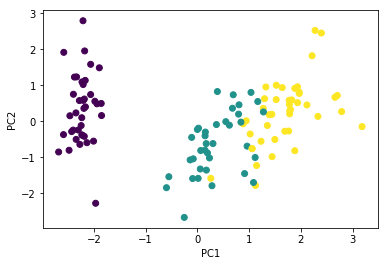

In [23]:
plt.scatter(X_train[:,0], X_train[:,1], c = integer_encoded)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Training and Making Predictions with RandomForestClassifier 

In [24]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Performance Evaluation : With PCA

In [25]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

[[11  0  0]
 [ 0 10  3]
 [ 0  1  5]]
0.8666666666666667


# Discussion

# Extra code

In [10]:
from sklearn.metrics import accuracy_score
y_pred = [0, 1, 2, 3]
y_true = [0, 1, 2, 4]
accuracy_score(y_true, y_pred)
accuracy_score(y_true, y_pred, normalize=False)

3

str is probably the builtin
str_ may be numpy.str_ 

In [38]:
#print(y_pred)
#print(type(y_pred))
y_pred=[str(x) for x in y_pred]
#y_pred=np.array(y_pred)
#print(y_pred)
print(type(y_pred))
print(type(y_pred[0]))
#print(y_test)
#print(type(y_test))
print('-----------------------')
y_test=[str(x) for x in y_test]
#print(y_test)
#y_test=np.array(y_test)
#print(y_test)
print(type(y_test))
print(type(y_test[0]))

accuracy=accuracy_score(y_test, y_pred)

print(accuracy)

#print('Accuracy' + classifier.score(X_test, y_test))

<class 'list'>
<class 'str'>
-----------------------
<class 'list'>
<class 'str'>
0.8333333333333334


In [189]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
#print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[0 0 2 0 1 1 2 0 2 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [188]:
from sklearn.preprocessing import LabelEncoder
values=['Male','Female','Street']
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer 
One_hot_encoder = OneHotEncoder()
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
One_hot_encoder = One_hot_encoder.fit_transform(integer_encoded)
#One_hot_encoder = np.array(columnTransformer.fit_transform(values), dtype = np.str) 
print(One_hot_encoder)

[1 0 2]
  (0, 1)	1.0
  (1, 0)	1.0
  (2, 2)	1.0
